In [3]:
import numpy as np
np.set_printoptions(suppress=True)
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from csv import DictReader
from datetime import datetime
from collections import defaultdict
import json
import pandas as pd
import collections

In [4]:
delay2 = []

reader = DictReader(open('DATA/delays.csv', 'rt', encoding='utf-8'))
for row in reader:
    timestamp = datetime.fromtimestamp(int(row["timestamp"])).strftime('%Y-%m-%d %H:%M')
    train_no = row["train_no"]
    train_type = row["train_type"]
    station_id = row["station_id"]
    delay_type = row["delay_type"]
    delay = row["delay"]
    delay2.append([timestamp,train_no,train_type,station_id,delay_type,delay])

delays = np.asarray(delay2)
#print(delays)

In [5]:
delays.size

19268154

In [14]:
edge = []

reader = DictReader(open('DATA/rail_edgelist.csv', 'rt', encoding='utf-8'))
for a, b in reader:
    edge.append((a, b))

edges = np.asarray(edge)
#print(delays)

In [16]:
edges.size

1070

In [3]:
slovar = defaultdict(lambda: 0)

for ts, tn, tt, si, dt, d in delays:
    slovar[tn] += int(d)

sort = {k: v for k, v in sorted(slovar.items(), key=lambda y: y[1], reverse=True)[:10]}
df = pd.DataFrame(sort.items(), columns =['Train_no', 'delay(min)'])

df

,Train_no,delay(min)
0,212,1507863
1,158,1398049
2,502,1219703
3,499,1178623
4,503,1173924
5,415,962358
6,498,897636
7,414,863110
8,246,788474
9,1415,652435


In [6]:
node = []
nodes_dict = defaultdict(lambda: 0)

reader = DictReader(open('DATA/rail_nodes.csv', 'rt', encoding='utf-8'))
for row in reader:
    id = row["id"]
    station_name = row["station_name"]
    lat = row["lat"]
    lng = row["lng"]
    
    node.append([id,station_name,lat,lng])
    nodes_dict[id] = station_name
    
nodes = np.asarray(node)
print(nodes_dict)

defaultdict(<function <lambda> at 0x000001DD622AE710>, {'42200': 'Zidani Most', '43001': 'Rimske Toplice', '43002': 'Laško', '43100': 'Celje', '43101': 'Štore', '43102': 'Šentjur', '43200': 'Grobelno', '43201': 'Ponikva', '43205': 'Ostrožno', '43202': 'Dolga Gora', '43203': 'Poljčane', '43204': 'Slovenska Bistrica', '43300': 'Pragersko', '43301': 'Rače', '43302': 'Orehova vas', '43303': 'Hoče', '43304': 'Maribor Tezno', '43400': 'Maribor', '43453': 'Šentilj', '43452': 'Cirknica', '43451': 'Pesnica', '42300': 'Ljubljana', '42805': 'Ljubljana Vodmat', '42804': 'Ljubljana Rakovnik', '42803': 'Lavrica', '42802': 'Škofljica', '42801': 'Šmarje-Sap', '42800': 'Grosuplje', '42857': 'Spodnja Slivnica', '42859': 'Čušperk', '42851': 'Dobrepolje', '42852': 'Velike Lašče', '42853': 'Ortnek', '42860': 'Žlebič', '42854': 'Ribnica', '42855': 'Stara Cerkev', '42856': 'Kočevje', '42001': 'Dobova', '42002': 'Brežice', '42003': 'Libna', '42004': 'Krško', '42005': 'Brestanica', '42006': 'Blanca', '42100': 

In [7]:
nodes.size

1064

In [5]:
schedule = json.load(open('DATA/train_schedule.json', encoding="utf8"))
scheduleDf = pd.DataFrame(schedule["2924"]) 

scheduleDf 

,train_type,train_stations
0,LPV,"{'id': '42200', 'arr': None, 'dep': '19:02'}"
1,LPV,"{'id': '43001', 'arr': '19:10', 'dep': '19:10'}"
2,LPV,"{'id': '43002', 'arr': '19:16', 'dep': '19:17'}"
3,LPV,"{'id': '43100', 'arr': '19:25', 'dep': '19:27'}"
4,LPV,"{'id': '43101', 'arr': '19:31', 'dep': '19:31'}"
5,LPV,"{'id': '43102', 'arr': '19:35', 'dep': '19:36'}"
6,LPV,"{'id': '43200', 'arr': '19:39', 'dep': '19:40'}"
7,LPV,"{'id': '43201', 'arr': '19:43', 'dep': '19:44'}"
8,LPV,"{'id': '43205', 'arr': '19:48', 'dep': '19:48'}"
9,LPV,"{'id': '43202', 'arr': '19:51', 'dep': '19:51'}"


In [9]:
seznam = []
with open('DATA/train_schedule.json') as f:
    data = json.load(f)
    df=pd.DataFrame(data)
for x in df:
    print(df[x])

train_type                                                      LPV
train_stations    [{'id': '42200', 'arr': None, 'dep': '19:02'},...
Name: 2924, dtype: object
train_type                                                      LPV
train_stations    [{'id': '43453', 'arr': '09:07', 'dep': '09:08...
Name: 4447, dtype: object
train_type                                                       LP
train_stations    [{'id': '42300', 'arr': None, 'dep': '04:55'},...
Name: 4487, dtype: object
train_type                                                       EN
train_stations    [{'id': '42001', 'arr': '21:51', 'dep': '22:06...
Name: 498, dtype: object
train_type                                                      LPV
train_stations    [{'id': '42001', 'arr': None, 'dep': '12:08'},...
Name: 2262, dtype: object
train_type                                                       LP
train_stations    [{'id': '43600', 'arr': None, 'dep': '05:53'},...
Name: 4100, dtype: object
train_type                   

Name: 3219, dtype: object
train_type                                                      LPV
train_stations    [{'id': '44903', 'arr': None, 'dep': '19:52'},...
Name: 2714, dtype: object
train_type                                                      LPV
train_stations    [{'id': '43400', 'arr': None, 'dep': '17:20'},...
Name: 2921, dtype: object
train_type                                                      LPV
train_stations    [{'id': '42400', 'arr': None, 'dep': '19:25'},...
Name: 2423, dtype: object
train_type                                                      LPV
train_stations    [{'id': '42300', 'arr': None, 'dep': '05:50'},...
Name: 2253, dtype: object
train_type                                                       LP
train_stations    [{'id': '44500', 'arr': None, 'dep': '20:50'},...
Name: 4218, dtype: object
train_type                                                       LP
train_stations    [{'id': '42600', 'arr': None, 'dep': '16:46'},...
Name: 3285, dtype: object
tr

Name: 2511, dtype: object
train_type                                                      LPV
train_stations    [{'id': '42300', 'arr': None, 'dep': '21:25'},...
Name: 2237, dtype: object
train_type                                                       LP
train_stations    [{'id': '43100', 'arr': None, 'dep': '14:40'},...
Name: 3701, dtype: object
train_type                                                       LP
train_stations    [{'id': '43652', 'arr': None, 'dep': '15:28'},...
Name: 3823, dtype: object
train_type                                                      LPV
train_stations    [{'id': '42307', 'arr': None, 'dep': '06:25'},...
Name: 2443, dtype: object
train_type                                                      LPV
train_stations    [{'id': '42001', 'arr': None, 'dep': '05:05'},...
Name: 2800, dtype: object
train_type                                                       LP
train_stations    [{'id': '43910', 'arr': None, 'dep': '18:25'},...
Name: 3525, dtype: object
tr

Name: 2500, dtype: object
train_type                                                      LPV
train_stations    [{'id': '42207', 'arr': None, 'dep': '06:20'},...
Name: 2222, dtype: object
train_type                                                       LP
train_stations    [{'id': '42100', 'arr': None, 'dep': '09:50'},...
Name: 3385, dtype: object
train_type                                                       LP
train_stations    [{'id': '43910', 'arr': None, 'dep': '14:48'},...
Name: 3513, dtype: object
train_type                                                       LP
train_stations    [{'id': '42356', 'arr': None, 'dep': '16:18'},...
Name: 3155, dtype: object
train_type                                                      LPV
train_stations    [{'id': '42001', 'arr': None, 'dep': '13:10'},...
Name: 2264, dtype: object
train_type                                                      LPV
train_stations    [{'id': '42307', 'arr': None, 'dep': '07:34'},...
Name: 2445, dtype: object
tr

train_type                                                      LPV
train_stations    [{'id': '43400', 'arr': None, 'dep': '07:27'},...
Name: 2807, dtype: object
train_type                                                      LPV
train_stations    [{'id': '42300', 'arr': None, 'dep': '22:25'},...
Name: 2283, dtype: object
train_type                                                       LP
train_stations    [{'id': '42400', 'arr': None, 'dep': '04:15'},...
Name: 4295, dtype: object
train_type                                                       LP
train_stations    [{'id': '42300', 'arr': None, 'dep': '11:00'},...
Name: 3209, dtype: object
train_type                                                       LP
train_stations    [{'id': '42511', 'arr': None, 'dep': '03:48'},...
Name: 3202, dtype: object
train_type                                                       LP
train_stations    [{'id': '43910', 'arr': None, 'dep': '06:30'},...
Name: 3517, dtype: object
train_type                  

Name: 3850, dtype: object
train_type                                                       LP
train_stations    [{'id': '42856', 'arr': None, 'dep': '21:07'},...
Name: 4498, dtype: object
train_type                                                       LP
train_stations    [{'id': '43100', 'arr': None, 'dep': '07:37'},...
Name: 3504, dtype: object
train_type                                                      LPV
train_stations    [{'id': '42400', 'arr': None, 'dep': '22:20'},...
Name: 2433, dtype: object
train_type                                                       LP
train_stations    [{'id': '43503', 'arr': '22:34', 'dep': '22:34...
Name: 4479, dtype: object
train_type                                                      LPV
train_stations    [{'id': '44352', 'arr': None, 'dep': '19:15'},...
Name: 2753, dtype: object
train_type                                                       IC
train_stations    [{'id': '43400', 'arr': None, 'dep': '15:20'},...
Name: 519, dtype: object
tra

Name: 602, dtype: object
train_type                                                       LP
train_stations    [{'id': '43400', 'arr': None, 'dep': '16:16'},...
Name: 4024, dtype: object
train_type                                                      LPV
train_stations    [{'id': '43400', 'arr': None, 'dep': '09:25'},...
Name: 2905, dtype: object
train_type                                                      LPV
train_stations    [{'id': '42200', 'arr': None, 'dep': '18:02'},...
Name: 2922, dtype: object
train_type                                                      LPV
train_stations    [{'id': '44500', 'arr': None, 'dep': '15:53'},...
Name: 2607, dtype: object
train_type                                                       LP
train_stations    [{'id': '42856', 'arr': None, 'dep': '19:04'},...
Name: 4486, dtype: object
train_type                                                       LP
train_stations    [{'id': '42856', 'arr': None, 'dep': '13:31'},...
Name: 4496, dtype: object
tra

Name: 2234, dtype: object
train_type                                                       LP
train_stations    [{'id': '43854', 'arr': None, 'dep': '05:50'},...
Name: 3616, dtype: object
train_type                                                       EC
train_stations    [{'id': '42001', 'arr': '07:54', 'dep': '08:11...
Name: 158, dtype: object
train_type                                                      AVT
train_stations    [{'id': '44712', 'arr': None, 'dep': '16:48'},...
Name: 859, dtype: object
train_type                                                      LPV
train_stations    [{'id': '43203', 'arr': None, 'dep': '14:24'},...
Name: 2986, dtype: object
train_type                                                       LP
train_stations    [{'id': '42300', 'arr': None, 'dep': '12:03'},...
Name: 3297, dtype: object
train_type                                                       LP
train_stations    [{'id': '42505', 'arr': None, 'dep': '14:13'},...
Name: 3218, dtype: object
trai

Name: 4291, dtype: object
train_type                                                       LP
train_stations    [{'id': '42300', 'arr': None, 'dep': '06:51'},...
Name: 4290, dtype: object
train_type                                                       LP
train_stations    [{'id': '42300', 'arr': None, 'dep': '19:15'},...
Name: 3188, dtype: object
train_type                                                       LP
train_stations    [{'id': '43806', 'arr': None, 'dep': '15:59'},...
Name: 3718, dtype: object
train_type                                                       IC
train_stations    [{'id': '42300', 'arr': None, 'dep': '19:50'},...
Name: 526, dtype: object
train_type                                                      LPV
train_stations    [{'id': '43400', 'arr': None, 'dep': '15:55'},...
Name: 2987, dtype: object
train_type                                                      LPV
train_stations    [{'id': '42300', 'arr': None, 'dep': '17:19'},...
Name: 2420, dtype: object
tra

Name: 4220, dtype: object
train_type                                                      AVT
train_stations    [{'id': '44707', 'arr': None, 'dep': '10:38'},...
Name: 854, dtype: object
train_type                                                      LPV
train_stations    [{'id': '42400', 'arr': None, 'dep': '07:57'},...
Name: 2499, dtype: object
train_type                                                      LPV
train_stations    [{'id': '42300', 'arr': None, 'dep': '07:20'},...
Name: 2235, dtype: object
train_type                                                       LP
train_stations    [{'id': '42300', 'arr': None, 'dep': '16:15'},...
Name: 3182, dtype: object
train_type                                                       LP
train_stations    [{'id': '43404', 'arr': None, 'dep': '21:31'},...
Name: 4027, dtype: object
train_type                                                       LP
train_stations    [{'id': '43400', 'arr': None, 'dep': '21:47'},...
Name: 4094, dtype: object
tra

In [10]:
df.size

1232

In [7]:
with open('DATA/train_schedule.json') as json_file:
    data = json.load(json_file)
for x in data:
    print(x)
    print(data[x])

2924
{'train_type': 'LPV', 'train_stations': [{'id': '42200', 'arr': None, 'dep': '19:02'}, {'id': '43001', 'arr': '19:10', 'dep': '19:10'}, {'id': '43002', 'arr': '19:16', 'dep': '19:17'}, {'id': '43100', 'arr': '19:25', 'dep': '19:27'}, {'id': '43101', 'arr': '19:31', 'dep': '19:31'}, {'id': '43102', 'arr': '19:35', 'dep': '19:36'}, {'id': '43200', 'arr': '19:39', 'dep': '19:40'}, {'id': '43201', 'arr': '19:43', 'dep': '19:44'}, {'id': '43205', 'arr': '19:48', 'dep': '19:48'}, {'id': '43202', 'arr': '19:51', 'dep': '19:51'}, {'id': '43203', 'arr': '19:57', 'dep': '19:58'}, {'id': '43204', 'arr': '20:04', 'dep': '20:05'}, {'id': '43300', 'arr': '20:09', 'dep': '20:10'}, {'id': '43301', 'arr': '20:14', 'dep': '20:15'}, {'id': '43302', 'arr': '20:17', 'dep': '20:17'}, {'id': '43303', 'arr': '20:19', 'dep': '20:20'}, {'id': '43304', 'arr': '20:24', 'dep': '20:24'}, {'id': '43400', 'arr': '20:27', 'dep': None}]}
4447
{'train_type': 'LPV', 'train_stations': [{'id': '43453', 'arr': '09:07',

3289
{'train_type': 'LP', 'train_stations': [{'id': '42300', 'arr': None, 'dep': '09:30'}, {'id': '42805', 'arr': '09:33', 'dep': '09:33'}, {'id': '42804', 'arr': '09:36', 'dep': '09:37'}, {'id': '42803', 'arr': '09:41', 'dep': '09:42'}, {'id': '42802', 'arr': '09:45', 'dep': '09:46'}, {'id': '42800', 'arr': '09:55', 'dep': '09:56'}, {'id': '42711', 'arr': '10:00', 'dep': '10:00'}, {'id': '42710', 'arr': '10:03', 'dep': '10:03'}, {'id': '42709', 'arr': '10:08', 'dep': '10:09'}, {'id': '42707', 'arr': '10:15', 'dep': '10:16'}, {'id': '42706', 'arr': '10:20', 'dep': '10:20'}, {'id': '42705', 'arr': '10:23', 'dep': '10:24'}, {'id': '42704', 'arr': '10:28', 'dep': '10:28'}, {'id': '42703', 'arr': '10:31', 'dep': '10:32'}, {'id': '42702', 'arr': '10:35', 'dep': '10:35'}, {'id': '42701', 'arr': '10:38', 'dep': '10:38'}, {'id': '42700', 'arr': '10:41', 'dep': '10:42'}, {'id': '42602', 'arr': '10:45', 'dep': '10:45'}, {'id': '42601', 'arr': '10:51', 'dep': '10:52'}, {'id': '42600', 'arr': '11:

In [8]:
df

,2924,4447,4487,498,2262,4100,7807,3171,7812,4455,...,2426,3831,3615,2258,2982,2608,2451,640,517,4255
train_type,LPV,LPV,LP,EN,LPV,LP,MO,LP,LP,LPV,...,LPV,LP,LP,LPV,LPV,LPV,LPV,RG,IC,LP
train_stations,"[{'id': '42200', 'arr': None, 'dep': '19:02'},...","[{'id': '43453', 'arr': '09:07', 'dep': '09:08...","[{'id': '42300', 'arr': None, 'dep': '04:55'},...","[{'id': '42001', 'arr': '21:51', 'dep': '22:06...","[{'id': '42001', 'arr': None, 'dep': '12:08'},...","[{'id': '43600', 'arr': None, 'dep': '05:53'},...","[{'id': '43652', 'arr': '18:28', 'dep': '18:30...","[{'id': '42356', 'arr': None, 'dep': '08:18'},...","[{'id': '43806', 'arr': '17:36', 'dep': '17:39...","[{'id': '43453', 'arr': '20:31', 'dep': '20:32...",...,"[{'id': '42300', 'arr': None, 'dep': '20:43'},...","[{'id': '43652', 'arr': None, 'dep': '16:20'},...","[{'id': '43800', 'arr': None, 'dep': '15:11'},...","[{'id': '42001', 'arr': None, 'dep': '10:10'},...","[{'id': '43203', 'arr': None, 'dep': '07:30'},...","[{'id': '44200', 'arr': None, 'dep': '16:21'},...","[{'id': '42307', 'arr': None, 'dep': '14:41'},...","[{'id': '43400', 'arr': None, 'dep': '09:20'},...","[{'id': '43400', 'arr': None, 'dep': '10:50'},...","[{'id': '44700', 'arr': None, 'dep': '13:50'},..."


In [34]:
ts_delays = defaultdict(lambda: 0)
ts_delays_d = defaultdict(lambda: 0)
ts_delays_a = defaultdict(lambda: 0)
ts_delays_e = defaultdict(lambda: 0)


for ts, tn, tt, si, dt, d in delays:
    month = ts[5:7]
    if (int(d) > 0):
        ts_delays[month] += 1
        if (dt == "D"):
            ts_delays_d[month] += 1
        if (dt == "A"):
            ts_delays_a[month] += 1
        if (dt == "E"):
            ts_delays_e[month] += 1
        
#sort_ts_delays = {k: v for k, v in sorted(ts_delays.items(), key=lambda y: y[1], reverse=True)}

sort_ts_delays = collections.OrderedDict(sorted(ts_delays.items()))
sort_ts_delays_d = collections.OrderedDict(sorted(ts_delays_d.items()))
sort_ts_delays_a = collections.OrderedDict(sorted(ts_delays_a.items()))
sort_ts_delays_e = collections.OrderedDict(sorted(ts_delays_e.items()))

print(sort_ts_delays)
print(sort_ts_delays_d)
print(sort_ts_delays_a)
print(sort_ts_delays_e)

defaultdict(<function <lambda> at 0x0000020D5CA400D0>, {'01': 127981, '02': 191807, '03': 214360, '05': 188547, '06': 299790, '07': 381954, '08': 571976, '09': 559691, '10': 418218, '11': 56966, '12': 57038, '04': 131746})
OrderedDict([('01', 112668), ('02', 167231), ('03', 185009), ('04', 107274), ('05', 160974), ('06', 249189), ('07', 317151), ('08', 469621), ('09', 471696), ('10', 348671), ('11', 47541), ('12', 49800)])
OrderedDict([('01', 7569), ('02', 11755), ('03', 15328), ('04', 9636), ('05', 13625), ('06', 17727), ('07', 33143), ('08', 45379), ('09', 44420), ('10', 26396), ('11', 4916), ('12', 5261)])
OrderedDict([('01', 7744), ('02', 12821), ('03', 14023), ('04', 14836), ('05', 13948), ('06', 32874), ('07', 31660), ('08', 56976), ('09', 43575), ('10', 43151), ('11', 4509), ('12', 1977)])


Text(0, 0.5, 'Delays')

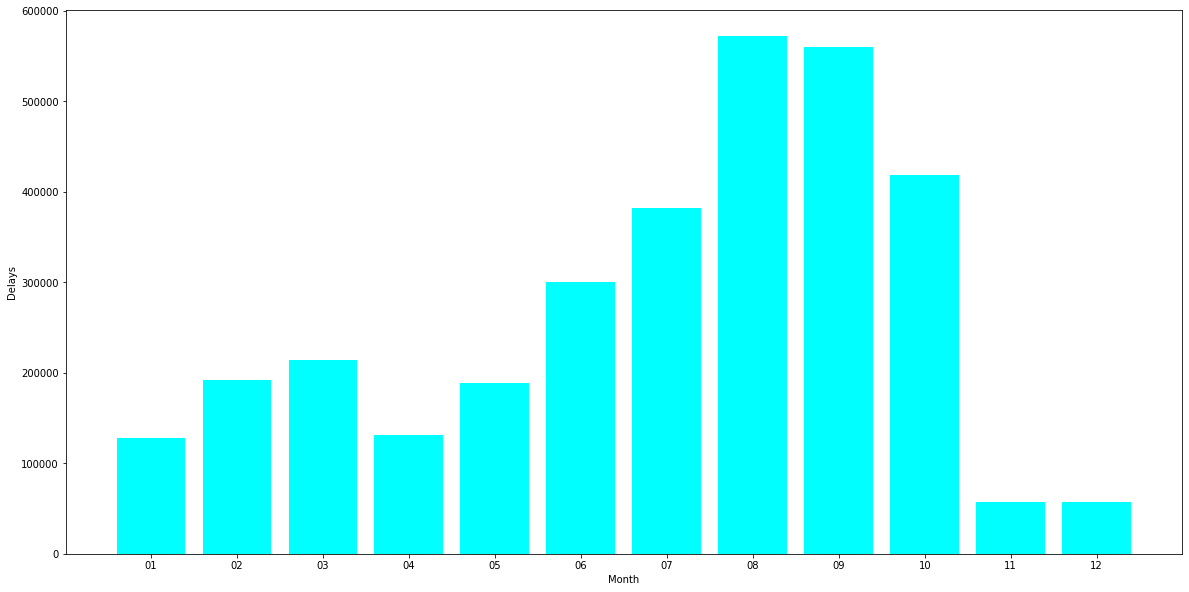

In [10]:
plt.figure(figsize=(20, 10))
#plt.xticks(rotation=90)
plt.bar(sort_ts_delays.keys(), sort_ts_delays.values(),color="cyan")
plt.xlabel("Month")
plt.ylabel("Delays")

Text(0, 0.5, 'Delays')

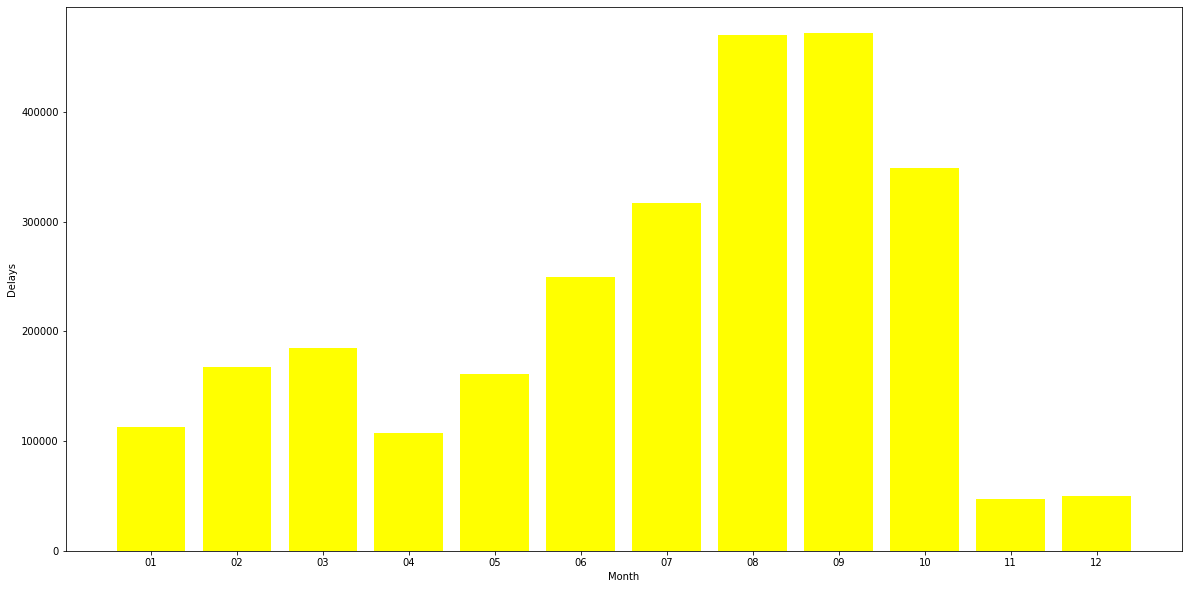

In [11]:
plt.figure(figsize=(20, 10))
#plt.xticks(rotation=90)
plt.bar(sort_ts_delays_d.keys(), sort_ts_delays_d.values(),color="yellow")
plt.xlabel("Month")
plt.ylabel("Delays")

Text(0, 0.5, 'Delays')

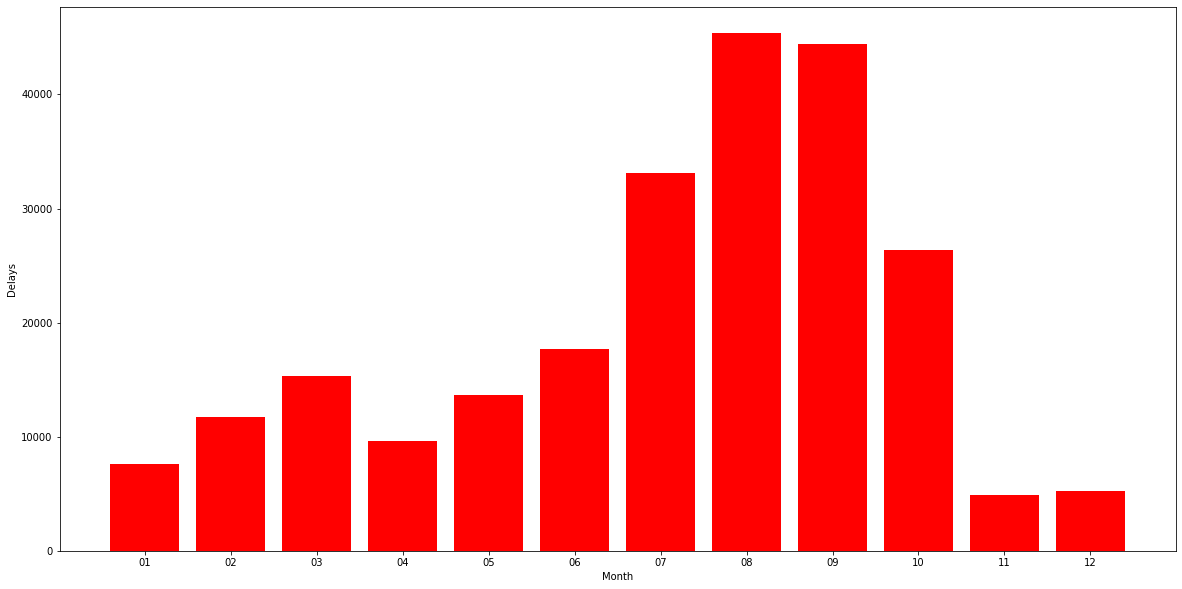

In [12]:
plt.figure(figsize=(20, 10))
#plt.xticks(rotation=90)
plt.bar(sort_ts_delays_a.keys(), sort_ts_delays_a.values(),color="red")
plt.xlabel("Month")
plt.ylabel("Delays")

Text(0, 0.5, 'Delays')

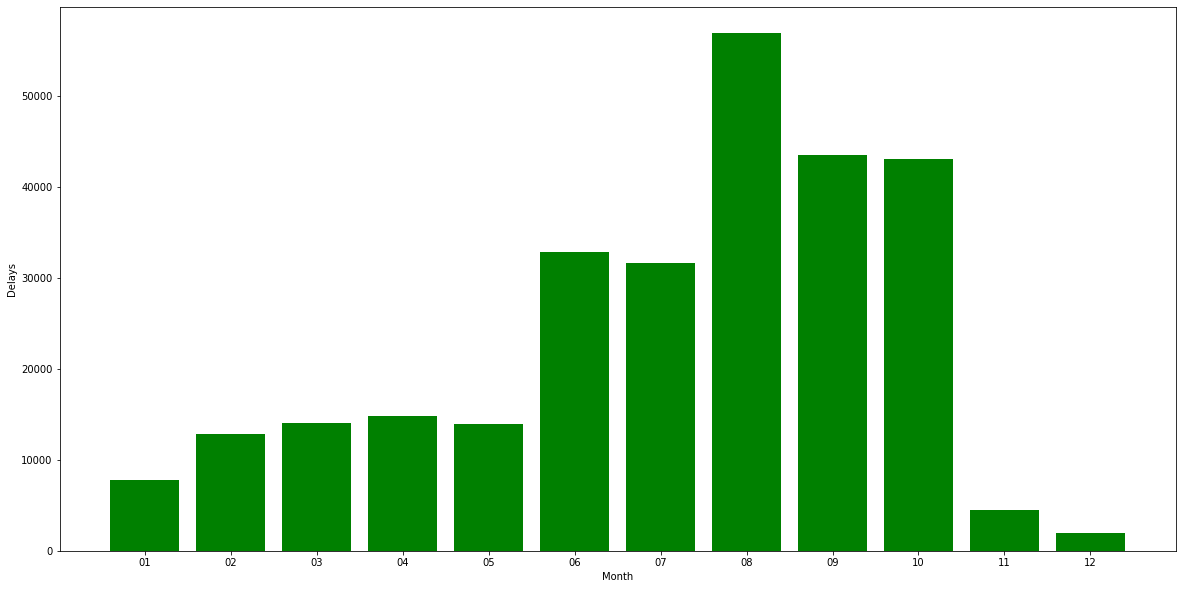

In [13]:
plt.figure(figsize=(20, 10))
#plt.xticks(rotation=90)
plt.bar(sort_ts_delays_e.keys(), sort_ts_delays_e.values(),color="green")
plt.xlabel("Month")
plt.ylabel("Delays")

Text(0, 0.5, 'Delays')

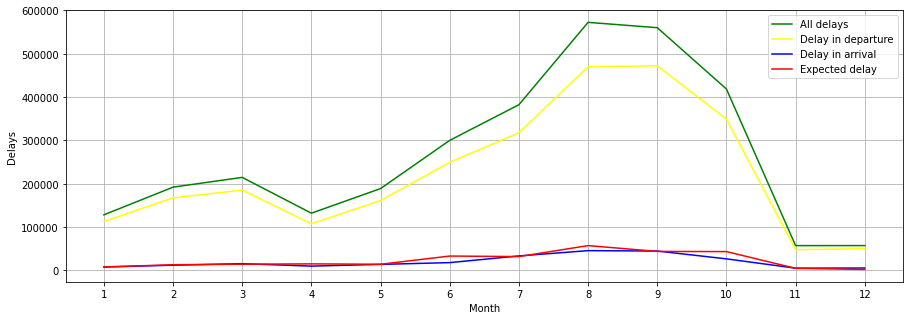

In [14]:
plt.figure(figsize=(15, 5))
plt.grid()
tsk = list(sort_ts_delays.keys())
tsk2 = []
for i in tsk:
    tsk2.append(int(i))
tsv = list(sort_ts_delays.values())
plt.xticks(tsk2)
plt.plot(tsk2, tsv, label = "All delays", color = "green")
plt.legend(loc = "upper right")

tsk_d = list(sort_ts_delays_d.keys())
tsk_d2 = []
for i in tsk_d:
    tsk_d2.append(int(i))
tsv_d = list(sort_ts_delays_d.values())
plt.xticks(tsk_d2)
plt.plot(tsk_d2, tsv_d, label = "Delay in departure", color = "yellow")
plt.legend(loc = "upper right")

tsk_a = list(sort_ts_delays_a.keys())
tsk_a2 = []
for i in tsk_a:
    tsk_a2.append(int(i))
tsv_a = list(sort_ts_delays_a.values())
plt.xticks(tsk_a2)
plt.plot(tsk_a2, tsv_a, label = "Delay in arrival", color = "blue")
plt.legend(loc = "upper right")

tsk_e = list(sort_ts_delays_e.keys())
tsk_e2 = []
for i in tsk_e:
    tsk_e2.append(int(i))
tsv_e = list(sort_ts_delays_e.values())
plt.xticks(tsk_e2)
plt.plot(tsk_e2, tsv_e, label = "Expected delay", color = "red")
plt.legend(loc = "upper right")



plt.xlabel("Month")
plt.ylabel("Delays")


In [15]:
delay_tipi_a = defaultdict(lambda: 0)
delay_tipi_d = defaultdict(lambda: 0)
delay_tipi_e = defaultdict(lambda: 0)

for ts, tn, tt, si, dt, d in delays:
    if (dt == "A"):
        delay_tipi_a[tt] += 1
    if (dt == "D"):
        delay_tipi_d[tt] += 1
    if (dt == "E"):
        delay_tipi_e[tt] += 1

print(delay_tipi_a)
print(delay_tipi_d)
print(delay_tipi_e)

defaultdict(<function <lambda> at 0x0000020D5B99BD00>, {'MO': 698, 'EN': 29177, 'LPV': 47179, 'LP': 52964, 'UNKNOWN': 1480, 'IC': 12178, 'MV': 16501, 'EC': 62201, 'RG': 7704, 'AVT': 4603, 'ICS': 470})
defaultdict(<function <lambda> at 0x0000020D5B99BC70>, {'IC': 238887, 'LP': 768851, 'LPV': 861223, 'MO': 19155, 'EN': 104781, 'UNKNOWN': 32899, 'EC': 295135, 'RG': 154597, 'MV': 143865, 'ICS': 29994, 'AVT': 37438})
defaultdict(<function <lambda> at 0x0000020D5B99BB50>, {'LPV': 76190, 'LP': 131853, 'UNKNOWN': 1546, 'EC': 26427, 'EN': 12507, 'RG': 8715, 'AVT': 8672, 'ICS': 295, 'MV': 13385, 'IC': 7712, 'MO': 2077})


Text(0, 0.5, 'Delays')

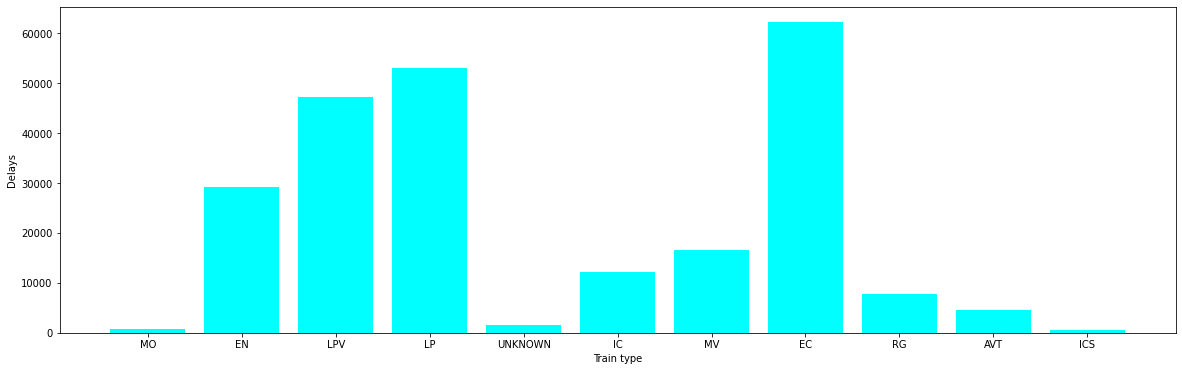

In [16]:
plt.figure(figsize=(20, 6))
#plt.xticks(rotation=90)
plt.bar(delay_tipi_a.keys(), delay_tipi_a.values(),color="cyan")
plt.xlabel("Train type")
plt.ylabel("Delays")

Text(0, 0.5, 'Delays')

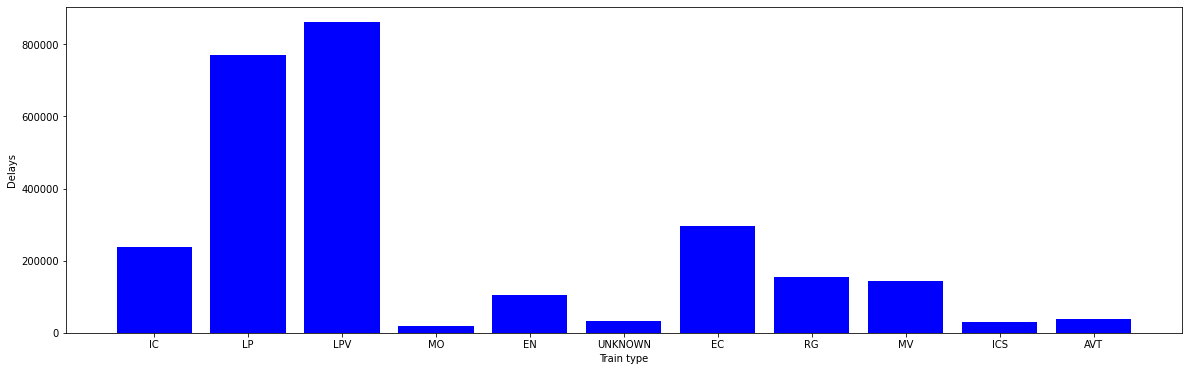

In [17]:
plt.figure(figsize=(20, 6))
#plt.xticks(rotation=90)
plt.bar(delay_tipi_d.keys(), delay_tipi_d.values(),color="blue")
plt.xlabel("Train type")
plt.ylabel("Delays")

Text(0, 0.5, 'Delays')

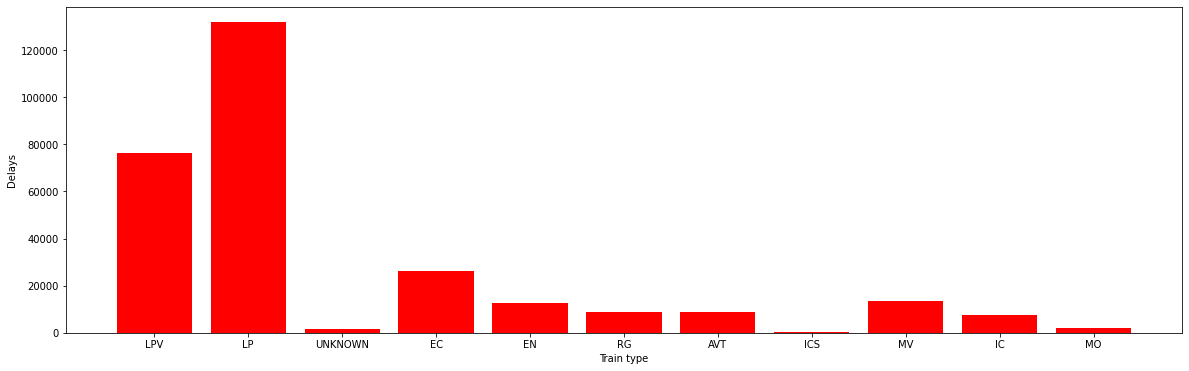

In [18]:
plt.figure(figsize=(20, 6))
#plt.xticks(rotation=90)
plt.bar(delay_tipi_e.keys(), delay_tipi_e.values(),color="red")
plt.xlabel("Train type")
plt.ylabel("Delays")

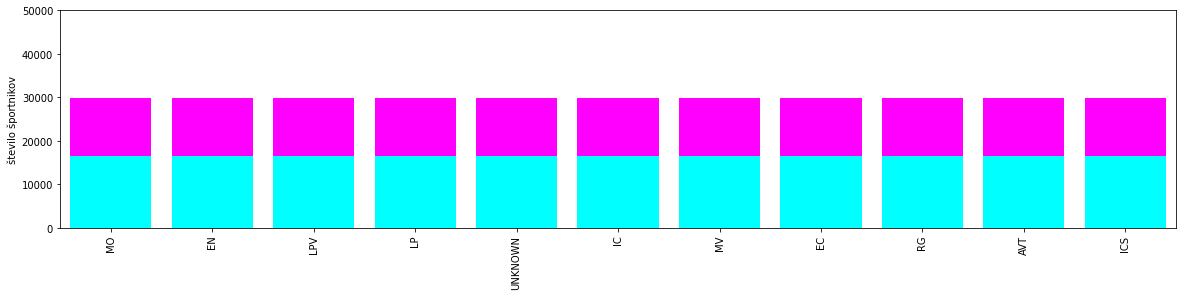

In [19]:
a = [delay_tipi_a[tt] for delay in delay_tipi_a]
e = [delay_tipi_e[tt] for delay in delay_tipi_e]

x = range(len(delay_tipi_a))

plt.figure(figsize=(20, 4))
plt.bar(x, a, color='cyan', align='center')
plt.bar(x, e, bottom=a, color='magenta', align='center')
plt.xlim(-0.5, len(delay_tipi_a )-0.5)
plt.ylim(top = 50000)
plt.xticks(x)
plt.gca().set_xticklabels(delay_tipi_a, rotation=90)
plt.ylabel('število športnikov');

In [ ]:

a = numpy.array([delay_tipi_a[tt] for tt in delay_tipi_a])
e = numpy.array([delay_tipi_e[tt] for tt in delay_tipi_a])
d = numpy.array([delay_tipi_d[tt] for tt in delay_tipi_a])
x = range(len())

plt.bar(x, gx, align="center", color=gold_color, label="zlato")
plt.bar(x, sx, align="center", bottom=gx, color=silv_color, label="srebro")
plt.bar(x, bx, align="center", bottom=gx+sx, color=bron_color, label="bron")
plt.xlim(-0.5, len(x)-0.5)
plt.legend()
plt.xticks(x)
plt.yticks(range(0, 25, 2))
plt.gca().set_xticklabels(countries, rotation=90)
plt.ylabel("število medalj")
plt.savefig('slike/odgovori/2-2-7.png', bbox_inches='tight')

In [116]:
df = pd.DataFrame(delay_tipi_a.values(), columns= delay_tipi_a)

ax = df.plot(x="X", y="A", kind="bar")
df.plot(x="X", y="B", kind="bar", ax=ax, color="C2")
df.plot(x="X", y="C", kind="bar", ax=ax, color="C3")

ValueError: Shape of passed values is (11, 1), indices imply (11, 11)

In [37]:
train_stations = defaultdict(lambda: 0)

for ts, tn, tt, si, dt, d in delays:
    if (dt == "A"):
        train_stations[nodes_dict[si]] += 1
    if (dt == "D"):
        train_stations[nodes_dict[si]] += 1
    if (dt == "E"):
        train_stations[nodes_dict[si]] += 1


In [85]:
sort_train_stations = dict(sorted(train_stations.items(), key=lambda item: item[1], reverse=True))


In [108]:
seznam_train_stations = list(sort_train_stations.items())[0:10]

In [109]:
print(seznam_train_stations)

[('Ljubljana', 116785), ('Jesenice', 108836), ('Zidani Most', 104024), ('Dobova', 102076), ('Kranj', 88350), ('Divača', 82564), ('Bohinjska Bistrica', 79431), ('Ljubljana Zalog', 61811), ('Most na Soči', 57235), ('Sevnica', 56178)]


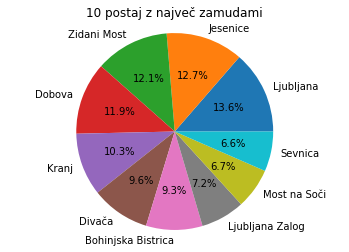

In [113]:
l = [] 
data = []

for x, y in seznam_train_stations:
    l.append(x)
    data.append(y)

fig, ax = plt.subplots()
ax.pie(data, labels=l, autopct='%1.1f%%')
ax.axis('equal')  
ax.set_title('10 postaj z največ zamudami')

plt.show()